<a href="https://colab.research.google.com/github/marlapmelo/classification/blob/main/CNN_classes_por_decis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cria o diretório local no ambiente do Colab
!mkdir -p /content/datasets/
# rsync para copiar de forma eficiente (é mais rápido que 'cp')
#!rsync [opções: a(archive), h(para formato), info=progress2(mostra barra de progresso)] [caminho da pasta de origem] [caminho da pasta de destino]
!rsync -ah --info=progress2 /content/drive/MyDrive/deapdb/j20/F22/ /content/datasets/images/

# novo caminho base para as imagens
local_data_path = '/content/datasets/images/'

          1.18G 100%  636.33kB/s    0:30:17 (xfr#6420, to-chk=0/6431)


# Bibliotecas

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import re
import time
import tensorflow as tf
from tensorflow.keras import regularizers

# Arquivos csv dis valores decis para valência

In [ ]:
data_decis = '/content/drive/MyDrive/Colab Notebooks/image_classification/relatorio/decis_valence.csv'
df = pd.read_csv(data_decis)
df.head()

,Unnamed: 0,Valence
0,0.1,2.080
1,0.2,3.088
2,0.3,4.030
3,0.4,4.940
4,0.5,5.040


In [ ]:
df_values = df.values
display(df_values)

array([[0.1  , 2.08 ],
       [0.2  , 3.088],
       [0.3  , 4.03 ],
       [0.4  , 4.94 ],
       [0.5  , 5.04 ],
       [0.6  , 6.054],
       [0.7  , 6.97 ],
       [0.8  , 7.12 ],
       [0.9  , 8.03 ]])

In [ ]:
data_csv = '/content/drive/MyDrive/deapdb/csv_files/participant_ratings.csv'
df_csv = pd.read_csv(data_csv)
df_csv.head()

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
0,1,1,5,1695918,6.96,3.92,7.19,6.05,4.0
1,1,2,18,2714905,7.23,7.15,6.94,8.01,4.0
2,1,3,4,3586768,4.94,6.01,6.12,8.06,4.0
3,1,4,24,4493800,7.04,7.09,8.01,8.22,4.0
4,1,5,20,5362005,8.26,7.91,7.19,8.13,1.0


In [ ]:
del df_d1

In [ ]:
df_d1 = df_csv[(df_csv['Valence'] >= 1) & (df_csv['Valence'] < 2.080)]

display(df_d1)
print("-"*55)
print("-"*55)
print(f"Número de amostras para valência Decil 1: {df_d1.shape}")
print("-"*55)
print("-"*55)
print(f"Número mínimo: df_d1.min(): {df_d1.min()}")
print("-"*55)
print("-"*55)
print(f"Número máximo: df_d1.max(): {df_d1.max()}")

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
8,1,9,13,8960934,1.95,3.12,2.87,6.18,1.0
11,1,12,10,11559734,1.99,4.86,2.04,7.09,2.0
12,1,13,35,12593050,2.06,8.15,8.05,5.18,1.0
22,1,23,29,23070480,1.36,2.27,3.00,8.14,2.0
42,2,3,35,10907105,1.99,2.00,1.00,1.00,NaN
...,...,...,...,...,...,...,...,...,...
1216,31,17,37,16147942,1.00,9.00,1.01,1.00,1.0
1218,31,19,38,17717467,1.00,9.00,1.00,1.00,1.0
1235,31,36,23,31439723,1.00,7.08,8.04,4.09,1.0
1252,32,13,24,12321148,1.00,7.31,4.85,6.86,5.0


-------------------------------------------------------
-------------------------------------------------------
Número de amostras para valência Decil 1: (127, 9)
-------------------------------------------------------
-------------------------------------------------------
Número mínimo: df_d1.min(): Participant_id          1.0
Trial                   1.0
Experiment_id          10.0
Start_time        2311873.0
Valence                 1.0
Arousal                 1.0
Dominance               1.0
Liking                  1.0
Familiarity             1.0
dtype: float64
-------------------------------------------------------
-------------------------------------------------------
Número máximo: df_d1.max(): Participant_id          32.00
Trial                   40.00
Experiment_id           40.00
Start_time        40720603.00
Valence                  2.06
Arousal                  9.00
Dominance                9.00
Liking                   9.00
Familiarity              5.00
dtype: float64


In [ ]:
df_d2 = df_csv[(df_csv['Valence'] >= 2.080) & (df_csv['Valence'] < 3.088)]

display(df_d2)
print("-"*55)
print("-"*55)
print(f"Número de amostras para valência Decil 2: {df_d2.shape}")
print("-"*55)
print("-"*55)
print(f"Número mínimo: df_d2.min(): {df_d2.min()}")
print("-"*55)
print("-"*55)
print(f"Número máximo: df_d2.max(): {df_d2.max()}")

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
5,1,6,31,6176062,3.03,8.14,2.86,8.04,1.0
15,1,16,17,15040219,2.46,6.91,6.77,6.41,4.0
16,1,17,36,15852443,2.90,6.92,6.50,3.87,1.0
17,1,18,34,16671331,2.28,7.09,7.28,6.92,1.0
20,1,21,11,21438533,2.99,2.36,3.63,6.24,1.0
...,...,...,...,...,...,...,...,...,...
1168,30,9,23,9440543,3.00,2.99,3.06,1.03,3.0
1169,30,10,21,10273320,3.05,2.90,3.05,1.00,1.0
1249,32,10,37,9832435,2.81,6.13,6.06,1.04,1.0
1270,32,31,38,26920483,3.05,7.01,5.10,1.10,1.0


-------------------------------------------------------
-------------------------------------------------------
Número de amostras para valência Decil 2: (129, 9)
-------------------------------------------------------
-------------------------------------------------------
Número mínimo: df_d2.min(): Participant_id          1.00
Trial                   1.00
Experiment_id           1.00
Start_time        2488482.00
Valence                 2.08
Arousal                 1.00
Dominance               1.00
Liking                  1.00
Familiarity             1.00
dtype: float64
-------------------------------------------------------
-------------------------------------------------------
Número máximo: df_d2.max(): Participant_id          32.00
Trial                   40.00
Experiment_id           40.00
Start_time        38269600.00
Valence                  3.08
Arousal                  8.99
Dominance                9.00
Liking                   9.00
Familiarity              5.00
dtype: floa

In [ ]:
df_d3 = df_csv[(df_csv['Valence'] >= 3.088) & (df_csv['Valence'] < 4.030)]

display(df_d3)
print("-"*55)
print("-"*55)
print(f"Número de amostras para valência Decil 3: {df_d3.shape}")
print("-"*55)
print("-"*55)
print(f"Número mínimo: df_d3.min(): {df_d3.min()}")
print("-"*55)
print("-"*55)
print(f"Número máximo: df_d3.max(): {df_d3.max()}")

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
7,1,8,39,8081417,3.24,6.18,7.87,6.15,1.0
9,1,10,33,9816492,3.81,3.85,4.78,5.13,1.0
14,1,15,15,14230827,3.17,8.08,2.91,5.04,1.0
29,1,30,28,28631424,3.88,3.35,4.01,7.87,1.0
32,1,33,38,31027614,3.33,7.18,6.54,6.62,1.0
...,...,...,...,...,...,...,...,...,...
1250,32,11,16,10629893,3.97,6.00,7.03,6.23,2.0
1255,32,16,35,14751253,3.88,7.26,6.04,1.00,1.0
1258,32,19,39,17263458,3.99,7.17,4.85,1.00,1.0
1264,32,25,36,22161046,3.91,6.96,5.82,3.12,1.0


-------------------------------------------------------
-------------------------------------------------------
Número de amostras para valência Decil 3: (121, 9)
-------------------------------------------------------
-------------------------------------------------------
Número mínimo: df_d3.min(): Participant_id          1.00
Trial                   1.00
Experiment_id           2.00
Start_time        2151428.00
Valence                 3.09
Arousal                 1.00
Dominance               1.00
Liking                  1.00
Familiarity             1.00
dtype: float64
-------------------------------------------------------
-------------------------------------------------------
Número máximo: df_d3.max(): Participant_id          32.00
Trial                   40.00
Experiment_id           40.00
Start_time        39215949.00
Valence                  4.01
Arousal                  9.00
Dominance                9.00
Liking                   8.03
Familiarity              5.00
dtype: floa

In [ ]:
df_d4 = df_csv[(df_csv['Valence'] >= 4.030) & (df_csv['Valence'] < 4.940)]

display(df_d4)
print("-"*55)
print("-"*55)
print(f"Número de amostras para valência Decil 4: {df_d4.shape}")
print("-"*55)
print("-"*55)
print(f"Número mínimo: df_d4.min(): {df_d4.min()}")
print("-"*55)
print("-"*55)
print(f"Número máximo: df_d4.max(): {df_d4.max()}")

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
18,1,19,14,17538704,4.18,2.24,3.04,5.04,4.0
38,1,39,9,35645376,4.04,3.29,3.62,5.99,5.0
43,2,4,31,11803301,4.06,7.05,1.00,9.00,NaN
52,2,13,28,19107153,4.06,4.97,7.14,7.04,NaN
77,2,38,34,41301779,4.87,1.00,6.99,1.00,NaN
...,...,...,...,...,...,...,...,...,...
1253,32,14,22,13099155,4.15,6.06,8.09,6.18,1.0
1265,32,26,34,22978167,4.05,6.27,7.03,1.26,1.0
1268,32,29,31,25341691,4.17,5.96,7.13,1.97,1.0
1271,32,32,29,27700383,4.09,6.08,8.97,4.00,2.0


-------------------------------------------------------
-------------------------------------------------------
Número de amostras para valência Decil 4: (132, 9)
-------------------------------------------------------
-------------------------------------------------------
Número mínimo: df_d4.min(): Participant_id          1.00
Trial                   1.00
Experiment_id           1.00
Start_time        2035968.00
Valence                 4.03
Arousal                 1.00
Dominance               1.00
Liking                  1.00
Familiarity             1.00
dtype: float64
-------------------------------------------------------
-------------------------------------------------------
Número máximo: df_d4.max(): Participant_id          32.00
Trial                   40.00
Experiment_id           40.00
Start_time        43923664.00
Valence                  4.92
Arousal                  9.00
Dominance                9.00
Liking                   9.00
Familiarity              5.00
dtype: floa

In [ ]:
df_d5 = df_csv[(df_csv['Valence'] >= 4.940) & (df_csv['Valence'] < 5.040)]

display(df_d5)
print("-"*55)
print("-"*55)
print(f"Número de amostras para valência Decil 5: {df_d5.shape}")
print("-"*55)
print("-"*55)
print(f"Número mínimo: df_d5.min(): {df_d5.min()}")
print("-"*55)
print("-"*55)
print(f"Número máximo: df_d5.max(): {df_d5.max()}")

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
2,1,3,4,3586768,4.94,6.01,6.12,8.06,4.0
40,2,1,27,9130709,4.96,5.01,3.01,5.05,NaN
47,2,8,33,15077689,5.00,8.03,3.01,1.00,NaN
54,2,15,7,20658459,4.96,1.99,4.08,1.00,NaN
55,2,16,6,21473014,5.00,4.94,5.04,1.01,NaN
...,...,...,...,...,...,...,...,...,...
1221,31,22,17,20180066,4.94,2.10,5.04,5.95,1.0
1236,31,37,31,32252843,5.00,5.00,3.03,6.92,1.0
1245,32,6,15,6564781,5.01,1.77,9.00,2.81,1.0
1247,32,8,2,8197153,4.99,2.99,7.96,1.01,1.0


-------------------------------------------------------
-------------------------------------------------------
Número de amostras para valência Decil 5: (91, 9)
-------------------------------------------------------
-------------------------------------------------------
Número mínimo: df_d5.min(): Participant_id          1.00
Trial                   1.00
Experiment_id           2.00
Start_time        3062284.00
Valence                 4.94
Arousal                 1.00
Dominance               1.00
Liking                  1.00
Familiarity             1.00
dtype: float64
-------------------------------------------------------
-------------------------------------------------------
Número máximo: df_d5.max(): Participant_id          32.00
Trial                   40.00
Experiment_id           40.00
Start_time        42088012.00
Valence                  5.03
Arousal                  8.12
Dominance                9.00
Liking                   8.06
Familiarity              5.00
dtype: float

In [ ]:
df_d6 = df_csv[(df_csv['Valence'] >= 5.040) & (df_csv['Valence'] < 6.054)]

display(df_d6)
print("-"*55)
print("-"*55)
print(f"Número de amostras para valência Decil 6: {df_d6.shape}")
print("-"*55)
print("-"*55)
print(f"Número mínimo: df_d6.min(): {df_d6.min()}")
print("-"*55)
print("-"*55)
print(f"Número máximo: df_d6.max(): {df_d6.max()}")

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
6,1,7,40,7138735,5.10,7.12,6.17,5.97,3.0
61,2,22,4,28562106,6.05,1.00,5.04,7.03,NaN
68,2,29,40,34353639,6.05,6.67,6.94,6.53,NaN
72,2,33,5,37446589,5.04,3.00,3.65,5.04,NaN
75,2,36,36,39780463,5.04,1.00,7.09,1.00,NaN
...,...,...,...,...,...,...,...,...,...
1240,32,1,28,2182545,6.03,5.00,8.28,6.36,5.0
1254,32,15,6,13900221,5.78,3.99,7.99,2.28,3.0
1263,32,24,20,21359815,6.03,4.12,9.00,5.03,1.0
1267,32,28,27,24551731,6.00,7.24,7.97,5.81,5.0


-------------------------------------------------------
-------------------------------------------------------
Número de amostras para valência Decil 6: (168, 9)
-------------------------------------------------------
-------------------------------------------------------
Número mínimo: df_d6.min(): Participant_id          1.00
Trial                   1.00
Experiment_id           1.00
Start_time        2182545.00
Valence                 5.04
Arousal                 1.00
Dominance               2.00
Liking                  1.00
Familiarity             1.00
dtype: float64
-------------------------------------------------------
-------------------------------------------------------
Número máximo: df_d6.max(): Participant_id          32.00
Trial                   40.00
Experiment_id           40.00
Start_time        42869078.00
Valence                  6.05
Arousal                  9.00
Dominance                9.00
Liking                   9.00
Familiarity              5.00
dtype: floa

In [ ]:
df_d7 = df_csv[(df_csv['Valence'] >=  6.054) & (df_csv['Valence'] < 6.970)]

display(df_d7)
print("-"*55)
print("-"*55)
print(f"Número de amostras para valência Decil 7: {df_d7.shape}")
print("-"*55)
print("-"*55)
print(f"Número mínimo: df_d7.min(): {df_d7.min()}")
print("-"*55)
print("-"*55)
print(f"Número máximo: df_d7.max(): {df_d7.max()}")

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
0,1,1,5,1695918,6.96,3.92,7.19,6.05,4.0
27,1,28,16,27096611,6.81,7.44,8.15,7.14,3.0
81,3,2,6,4350184,6.79,1.97,4.38,7.32,2.0
95,3,16,27,15659675,6.72,3.29,4.46,6.22,1.0
103,3,24,12,27014964,6.36,3.15,3.12,6.29,1.0
...,...,...,...,...,...,...,...,...,...
1225,31,26,16,23393193,6.09,4.00,2.03,7.05,1.0
1229,31,30,9,26667908,6.06,3.88,6.04,6.96,3.0
1233,31,34,5,29834496,6.22,5.03,6.13,7.08,3.0
1257,32,18,4,16386195,6.96,5.14,9.00,6.14,3.0


-------------------------------------------------------
-------------------------------------------------------
Número de amostras para valência Decil 7: (126, 9)
-------------------------------------------------------
-------------------------------------------------------
Número mínimo: df_d7.min(): Participant_id          1.00
Trial                   1.00
Experiment_id           1.00
Start_time        1695918.00
Valence                 6.06
Arousal                 1.00
Dominance               1.96
Liking                  1.73
Familiarity             1.00
dtype: float64
-------------------------------------------------------
-------------------------------------------------------
Número máximo: df_d7.max(): Participant_id          32.00
Trial                   40.00
Experiment_id           40.00
Start_time        40160125.00
Valence                  6.96
Arousal                  9.00
Dominance                9.00
Liking                   8.97
Familiarity              5.00
dtype: floa

In [ ]:
df_d8 = df_csv[(df_csv['Valence'] >= 6.970) & (df_csv['Valence'] < 7.120)]

display(df_d8)
print("-"*55)
print("-"*55)
print(f"Número de amostras para valência Decil 8: {df_d8.shape}")
print("-"*55)
print("-"*55)
print(f"Número mínimo: df_d8.min(): {df_d8.min()}")
print("-"*55)
print("-"*55)
print(f"Número máximo: df_d8.max(): {df_d8.max()}")

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
3,1,4,24,4493800,7.04,7.09,8.01,8.22,4.0
13,1,14,22,13429432,7.09,2.08,7.06,7.37,1.0
48,2,9,24,15891248,7.08,9.00,6.06,9.00,NaN
60,2,21,11,27803863,7.08,1.00,7.01,7.00,NaN
85,3,6,18,7611909,7.10,2.13,5.04,6.32,4.0
...,...,...,...,...,...,...,...,...,...
1207,31,8,26,8677170,7.08,1.96,4.05,8.04,1.0
1220,31,21,18,19354741,7.06,2.62,6.90,8.12,5.0
1231,31,32,4,28236311,6.97,2.96,5.97,6.99,1.0
1242,32,3,14,4006583,7.10,6.03,9.00,6.83,3.0


-------------------------------------------------------
-------------------------------------------------------
Número de amostras para valência Decil 8: (127, 9)
-------------------------------------------------------
-------------------------------------------------------
Número mínimo: df_d8.min(): Participant_id          1.00
Trial                   1.00
Experiment_id           1.00
Start_time        2942276.00
Valence                 6.97
Arousal                 1.00
Dominance               1.00
Liking                  2.92
Familiarity             1.00
dtype: float64
-------------------------------------------------------
-------------------------------------------------------
Número máximo: df_d8.max(): Participant_id          32.0
Trial                   39.0
Experiment_id           40.0
Start_time        42926008.0
Valence                  7.1
Arousal                  9.0
Dominance                9.0
Liking                   9.0
Familiarity              5.0
dtype: float64


In [ ]:
df_d9 = df_csv[(df_csv['Valence'] >= 7.120) & (df_csv['Valence'] < 8.030)]

display(df_d9)
print("-"*55)
print("-"*55)
print(f"Número de amostras para valência Decil 9: {df_d9.shape}")
print("-"*55)
print("-"*55)
print(f"Número mínimo: df_d9.min(): {df_d9.min()}")
print("-"*55)
print("-"*55)
print(f"Número máximo: df_d9.max(): {df_d9.max()}")

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
1,1,2,18,2714905,7.23,7.15,6.94,8.01,4.0
19,1,20,27,18394413,7.35,6.95,7.03,7.29,4.0
23,1,24,1,23886202,7.71,7.60,6.90,7.83,5.0
24,1,25,7,24727583,7.44,3.73,7.08,7.04,2.0
30,1,31,8,29432485,7.32,2.55,6.32,5.87,4.0
...,...,...,...,...,...,...,...,...,...
1244,32,5,9,5746561,7.86,4.17,8.94,7.04,5.0
1248,32,9,8,9014043,7.96,6.06,8.05,7.15,3.0
1256,32,17,12,15567977,7.31,3.88,9.00,5.33,1.0
1262,32,23,40,20580655,7.15,4.03,9.00,1.88,1.0


-------------------------------------------------------
-------------------------------------------------------
Número de amostras para valência Decil 9: (124, 9)
-------------------------------------------------------
-------------------------------------------------------
Número mínimo: df_d9.min(): Participant_id          1.00
Trial                   1.00
Experiment_id           1.00
Start_time        2696702.00
Valence                 7.12
Arousal                 2.05
Dominance               1.00
Liking                  1.88
Familiarity             1.00
dtype: float64
-------------------------------------------------------
-------------------------------------------------------
Número máximo: df_d9.max(): Participant_id          32.00
Trial                   40.00
Experiment_id           40.00
Start_time        45056948.00
Valence                  8.01
Arousal                  8.74
Dominance                9.00
Liking                   9.00
Familiarity              5.00
dtype: floa

In [ ]:
df_d10 = df_csv[(df_csv['Valence'] >= 8.030) & (df_csv['Valence'] <= 9)]

display(df_d10)
print("-"*55)
print("-"*55)
print(f"Número de amostras para valência Decil 10: {df_d10.shape}")
print("-"*55)
print("-"*55)
print(f"Número mínimo: df_d10.min(): {df_d10.min()}")
print("-"*55)
print("-"*55)
print(f"Número máximo: df_d10.max(): {df_d10.max()}")

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
4,1,5,20,5362005,8.26,7.91,7.19,8.13,1.0
10,1,11,6,10696693,8.27,3.92,7.00,8.03,2.0
28,1,29,25,27849356,8.86,7.21,8.65,7.21,2.0
31,1,32,3,30256705,8.58,7.54,9.00,7.08,5.0
35,1,36,2,33358152,8.10,7.31,7.28,8.47,2.0
...,...,...,...,...,...,...,...,...,...
1260,32,21,11,19021628,8.24,6.22,8.99,6.88,3.0
1269,32,30,19,26142197,8.24,7.24,9.00,8.04,5.0
1275,32,36,1,30916115,8.13,4.83,9.00,4.87,2.0
1276,32,37,18,31703107,8.03,7.06,8.96,8.18,5.0


-------------------------------------------------------
-------------------------------------------------------
Número de amostras para valência Decil 10: (135, 9)
-------------------------------------------------------
-------------------------------------------------------
Número mínimo: df_d10.min(): Participant_id          1.00
Trial                   1.00
Experiment_id           1.00
Start_time        2480922.00
Valence                 8.03
Arousal                 1.82
Dominance               1.92
Liking                  4.87
Familiarity             1.00
dtype: float64
-------------------------------------------------------
-------------------------------------------------------
Número máximo: df_d10.max(): Participant_id          32.0
Trial                   40.0
Experiment_id           36.0
Start_time        46052439.0
Valence                  9.0
Arousal                  9.0
Dominance                9.0
Liking                   9.0
Familiarity              5.0
dtype: float64


In [ ]:
baixa = pd.concat([df_d1, df_d2, df_d3, df_d4])
alta = pd.concat([df_d7, df_d8, df_d9, df_d10])

print("DataFrame 'baixa':")
display(baixa.head())
print("\nDataFrame 'alta':")
display(alta.head())

DataFrame 'baixa':


,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
8,1,9,13,8960934,1.95,3.12,2.87,6.18,1.0
11,1,12,10,11559734,1.99,4.86,2.04,7.09,2.0
12,1,13,35,12593050,2.06,8.15,8.05,5.18,1.0
22,1,23,29,23070480,1.36,2.27,3.00,8.14,2.0
42,2,3,35,10907105,1.99,2.00,1.00,1.00,NaN



DataFrame 'alta':


,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
0,1,1,5,1695918,6.96,3.92,7.19,6.05,4.0
27,1,28,16,27096611,6.81,7.44,8.15,7.14,3.0
81,3,2,6,4350184,6.79,1.97,4.38,7.32,2.0
95,3,16,27,15659675,6.72,3.29,4.46,6.22,1.0
103,3,24,12,27014964,6.36,3.15,3.12,6.29,1.0


## **salva os arquivos com as avaliações dos participantes separadas em classes baixa e alta que foram definidas pelos decis.**

In [ ]:
df_baixa = baixa.to_csv('/content/drive/MyDrive/Colab Notebooks/image_classification/relatorio/baixa.csv', index=False)
df_alta = alta.to_csv('/content/drive/MyDrive/Colab Notebooks/image_classification/relatorio/alta.csv', index=False)

# **Classificação**

## configuração dos parâmetros
tamanho da imagem e tamanho de lote

In [ ]:
IMG_HEIGHT = 72
IMG_WIDTH = 72
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE # Otimização automática do TensorFlow

## definição do caminho das pastas de imagens



In [ ]:
data_train_baixa_image = '/content/drive/MyDrive/deapdb/j20/F22/train/baixa'
data_train_alta_image = '/content/drive/MyDrive/deapdb/j20/F22/train/alta'
data_image = '/content/drive/MyDrive/deapdb/j20/F22/'

#'/content/datasets/images/'

#data_train_baixa_image = '/content/datasets/images/train/baixa'
#data_train_alta_image = '/content/datasets/images/train/alta'
#data_image = '/content/datasets/images/'

## carrega os arquivos csv
divisão das amostras em classe baixa e alta pelo ponto de corte baseado em decis

In [ ]:
baixa_df_from_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/image_classification/relatorio/baixa.csv')
display(baixa_df_from_csv.head())
display(baixa_df_from_csv.shape)

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
0,1,9,13,8960934,1.95,3.12,2.87,6.18,1.0
1,1,12,10,11559734,1.99,4.86,2.04,7.09,2.0
2,1,13,35,12593050,2.06,8.15,8.05,5.18,1.0
3,1,23,29,23070480,1.36,2.27,3.00,8.14,2.0
4,2,3,35,10907105,1.99,2.00,1.00,1.00,NaN


(509, 9)

In [ ]:
alta_df_from_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/image_classification/relatorio/alta.csv')
display(alta_df_from_csv.head())
display(alta_df_from_csv.shape)

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
0,1,1,5,1695918,6.96,3.92,7.19,6.05,4.0
1,1,28,16,27096611,6.81,7.44,8.15,7.14,3.0
2,3,2,6,4350184,6.79,1.97,4.38,7.32,2.0
3,3,16,27,15659675,6.72,3.29,4.46,6.22,1.0
4,3,24,12,27014964,6.36,3.15,3.12,6.29,1.0


(512, 9)

### filtra as amostras da classe baixa para selecionar as imagens

In [ ]:
# Usar um 'set' (conjunto) para a verificação é muito mais rápido
try:
    indicadores_baixa = set()
    for index, row in baixa_df_from_csv.iterrows():
        indicador = (row['Participant_id'], row['Experiment_id'])
        indicadores_baixa.add(indicador)
    print(f"DataFrame lido com sucesso. {len(indicadores_baixa)} indicadores de imagem a serem selecionados.")
except Exception as e:
    print(f"ERRO: Ocorreu um erro ao processar o DataFrame: {e}")


# 2. FILTRAGEM E SELEÇÃO DAS IMAGENS
train_paths_baixa = []

# Verifica se a variável do caminho das imagens foi definida
if 'data_train_baixa_image' in locals():
    for raiz, _, arquivos in os.walk(data_train_baixa_image):
        for nome_arquivo in arquivos:
            # Verifica se é um arquivo de imagem
            if nome_arquivo.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Extrai os IDs do nome do arquivo
                match = re.search(r's(\d+)v(\d+)', nome_arquivo)
                if match:
                    participante_id = int(match.group(1))
                    experimento_id = int(match.group(2))

                    # Adiciona a imagem à lista SE o seu ID estiver no conjunto
                    if (participante_id, experimento_id) in indicadores_baixa:
                        caminho_completo = os.path.join(raiz, nome_arquivo)
                        train_paths_baixa.append(caminho_completo)

    print(f"Total de imagens selecionadas para a classe baixa do conjunto de treino: {len(train_paths_baixa)}")
else:
    print("ERRO: A variável 'data_train_baixa_image' com o caminho para as imagens não foi definida.")

DataFrame lido com sucesso. 509 indicadores de imagem a serem selecionados.
Total de imagens selecionadas para a classe baixa do conjunto de treino: 1945


### filtra as amostras da classe alta para selecionar as imagens

In [ ]:
# Usar um 'set' (conjunto) para a verificação é muito mais rápido
try:
    indicadores_alta = set()
    for index, row in alta_df_from_csv.iterrows():
        indicador = (row['Participant_id'], row['Experiment_id'])
        indicadores_alta.add(indicador)
    print(f"DataFrame lido com sucesso. {len(indicadores_alta)} indicadores de imagem a serem selecionados.")
except Exception as e:
    print(f"ERRO: Ocorreu um erro ao processar o DataFrame: {e}")


# 2. FILTRAGEM E SELEÇÃO DAS IMAGENS
train_paths_alta = []

# Verifica se a variável do caminho das imagens foi definida
if 'data_train_alta_image' in locals():
    for raiz, _, arquivos in os.walk(data_train_alta_image):
        for nome_arquivo in arquivos:
            # Verifica se é um arquivo de imagem
            if nome_arquivo.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Extrai os IDs do nome do arquivo
                match = re.search(r's(\d+)v(\d+)', nome_arquivo)
                if match:
                    participante_id = int(match.group(1))
                    experimento_id = int(match.group(2))

                    # Adiciona a imagem à lista SE o seu ID estiver no conjunto
                    if (participante_id, experimento_id) in indicadores_alta:
                        caminho_completo = os.path.join(raiz, nome_arquivo)
                        train_paths_alta.append(caminho_completo)

    print(f"Total de imagens selecionadas para a classe alta do conjunto de treino: {len(train_paths_alta)}")
else:
    print("ERRO: A variável 'data_train_alta_image' com o caminho para as imagens não foi definida.")

DataFrame lido com sucesso. 512 indicadores de imagem a serem selecionados.
Total de imagens selecionadas para a classe alta do conjunto de treino: 1975


#### verificação

In [ ]:
print(train_paths_baixa)
print(train_paths_alta)

['/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s19v40_1_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s19v40_2_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s19v40_3_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s19v40_4_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s19v40_5_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s20v22_1_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s20v22_2_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s20v22_3_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s20v22_4_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s20v22_5_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s20v23_1_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s20v23_2_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s20v23_3_22hz.png', '/content/drive/MyDrive/deapdb/j20/F22/train/baixa/s20v23_4_22hz.png', '/con

## juntar as duas listas

In [ ]:
train_paths = train_paths_baixa + train_paths_alta

## criar os rótulos
 **0** = BAIXA

**1** = ALTA

In [ ]:
# CRIAR LABELS PARA CADA CONJUNTO
labels_baixa = [0] * len(train_paths_baixa)
labels_alta = [1] * len(train_paths_alta)
train_labels = labels_baixa + labels_alta

print(f"Total de imagens: {len(train_paths)}")
print(f"Total de rótulos: {len(train_labels)}")

Total de imagens: 3920
Total de rótulos: 3920


## carrega o conjunto de validação e teste sem utilizar o ponto de corte

In [ ]:
# listas separadas para treino e validação
val_paths = []
test_paths = []

validation_folder_str = os.path.sep + 'validation' + os.path.sep
test_folder_str = os.path.sep + 'test' + os.path.sep

for raiz, _, arquivos in os.walk(data_image):
    for nome_arquivo in arquivos:
        if nome_arquivo.lower().endswith(('.png', '.jpg', '.jpeg')):
          caminho_completo = os.path.join(raiz, nome_arquivo)
          if validation_folder_str in caminho_completo:
            val_paths.append(caminho_completo)
          elif test_folder_str in caminho_completo:
            test_paths.append(caminho_completo)

print(f"Total de imagens para validação: {len(val_paths)}")
print(f"Total de imagens para teste: {len(test_paths)}")

Total de imagens para validação: 960
Total de imagens para teste: 545


## criar os rótulos
 **0** = BAIXA

 **1** = ALTA

In [ ]:
val_labels = [1 if os.path.sep + 'alta' + os.path.sep in img_path else 0 for img_path in val_paths]
test_labels = [1 if os.path.sep + 'alta' + os.path.sep in img_path else 0 for img_path in test_paths]

#

# CRIAR OS DATASETS DE TREINO E VALIDAÇÃO usando tensores

In [ ]:
# FUNÇÃO PARA CRIAR O PIPELINE DE DADOS
def create_dataset(paths, labels, shuffle=False):
    path_ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    def process_path(file_path, label):
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
        img = img / 255.0
        return img, label

    # APLICAR A FUNÇÃO AO DATASET E OTIMIZAR ---
    # .map() aplica a função 'process_path' em paralelo para maior eficiência
    # 'num_parallel_calls=AUTOTUNE' permite que o TensorFlow decida o nível de paralelismo
    dataset = path_ds.map(process_path, num_parallel_calls=AUTOTUNE)

    # .shuffle() embaralha os dados para evitar que o modelo aprenda a ordem
    # O buffer_size deve ser grande o suficiente para uma boa aleatoriedade
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(paths))
    dataset = dataset.batch(BATCH_SIZE)

    # .prefetch() pré-carrega os próximos lotes na memória enquanto o modelo está treinando o lote atual.
    # Isso evita gargalos de I/O e mantém a GPU sempre ocupada.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    return dataset

# CRIAR OS DATASETS DE TREINO E VALIDAÇÃO
# O dataset de treino é embaralhado
train_ds = create_dataset(train_paths, train_labels, shuffle=True)

# O dataset de validação NÃO é embaralhado
val_ds = create_dataset(val_paths, val_labels)

# O dataset de teste NÃO é embaralhado
test_ds = create_dataset(test_paths, test_labels)

print("Dataset de Treino:", train_ds)
print("Dataset de Validação:", val_ds)
print("Dataset de Teste:", test_ds)

Dataset de Treino: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 72, 72, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Dataset de Validação: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 72, 72, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Dataset de Teste: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 72, 72, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
start_time = time.time()
print(train_ds)
print("\nEspecificações do Elemento (estrutura de um lote):")
print(train_ds.element_spec)
print('-'*40)
print(val_ds)
print("\nEspecificações do Elemento (estrutura de um lote):")
print(val_ds.element_spec)
print('-'*40)
print(test_ds)
print("\nEspecificações do Elemento (estrutura de um lote):")
print(test_ds.element_spec)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 72, 72, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Especificações do Elemento (estrutura de um lote):
(TensorSpec(shape=(None, 72, 72, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
----------------------------------------
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 72, 72, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Especificações do Elemento (estrutura de um lote):
(TensorSpec(shape=(None, 72, 72, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
----------------------------------------
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 72, 72, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Especificações do Elemento (estrutura de um lote):
(TensorSpec(shape=(None, 72, 72, 3), dtype=tf.float32, name=N

##  Verificar lotes

In [ ]:
# Pega um único lote do dataset
start_time = time.time()
for image_batch, label_batch in train_ds.take(1):
    print("--- Inspecionando um Lote ---")

    # 1. Verificar a forma (shape) dos tensores do lote
    print("Shape do lote de imagens:", image_batch.shape)
    print("Shape do lote de etiquetas:", label_batch.shape)

    # 2. Verificar o tipo de dado (dtype)
    print("\nDType do lote de imagens:", image_batch.dtype)
    print("DType do lote de etiquetas:", label_batch.dtype)

    # 3. Verificar o intervalo de valores das imagens (muito útil para confirmar a normalização)
    print("\nValor mínimo de um pixel no lote:", tf.reduce_min(image_batch).numpy())
    print("Valor máximo de um pixel no lote:", tf.reduce_max(image_batch).numpy())

    # 4. Olhar para as primeiras etiquetas do lote
    print("\nPrimeiras 5 etiquetas do lote:", label_batch.numpy()[:5])
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

--- Inspecionando um Lote ---
Shape do lote de imagens: (32, 72, 72, 3)
Shape do lote de etiquetas: (32,)

DType do lote de imagens: <dtype: 'float32'>
DType do lote de etiquetas: <dtype: 'int32'>

Valor mínimo de um pixel no lote: 0.0
Valor máximo de um pixel no lote: 1.0

Primeiras 5 etiquetas do lote: [1 1 0 0 0]
Tempo de treinamento: 5.14 segundos


In [ ]:
# Pega um único lote do dataset
start_time = time.time()
for image_batch, label_batch in val_ds.take(1):
    print("--- Inspecionando um Lote ---")

    # 1. Verificar a forma (shape) dos tensores do lote
    print("Shape do lote de imagens:", image_batch.shape)
    print("Shape do lote de etiquetas:", label_batch.shape)

    # 2. Verificar o tipo de dado (dtype)
    print("\nDType do lote de imagens:", image_batch.dtype)
    print("DType do lote de etiquetas:", label_batch.dtype)

    # 3. Verificar o intervalo de valores das imagens (muito útil para confirmar a normalização)
    print("\nValor mínimo de um pixel no lote:", tf.reduce_min(image_batch).numpy())
    print("Valor máximo de um pixel no lote:", tf.reduce_max(image_batch).numpy())

    # 4. Olhar para as primeiras etiquetas do lote
    print("\nPrimeiras 5 etiquetas do lote:", label_batch.numpy()[:5])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

--- Inspecionando um Lote ---
Shape do lote de imagens: (32, 72, 72, 3)
Shape do lote de etiquetas: (32,)

DType do lote de imagens: <dtype: 'float32'>
DType do lote de etiquetas: <dtype: 'int32'>

Valor mínimo de um pixel no lote: 0.0
Valor máximo de um pixel no lote: 1.0

Primeiras 5 etiquetas do lote: [0 0 0 0 0]
Tempo de treinamento: 0.05 segundos


In [ ]:
# Pega um único lote do dataset
start_time = time.time()
for image_batch, label_batch in test_ds.take(1):
    print("--- Inspecionando um Lote ---")

    # 1. Verificar a forma (shape) dos tensores do lote
    print("Shape do lote de imagens:", image_batch.shape)
    print("Shape do lote de etiquetas:", label_batch.shape)

    # 2. Verificar o tipo de dado (dtype)
    print("\nDType do lote de imagens:", image_batch.dtype)
    print("DType do lote de etiquetas:", label_batch.dtype)

    # 3. Verificar o intervalo de valores das imagens (muito útil para confirmar a normalização)
    print("\nValor mínimo de um pixel no lote:", tf.reduce_min(image_batch).numpy())
    print("Valor máximo de um pixel no lote:", tf.reduce_max(image_batch).numpy())

    # 4. Olhar para as primeiras etiquetas do lote
    print("\nPrimeiras 5 etiquetas do lote:", label_batch.numpy()[:5])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

--- Inspecionando um Lote ---
Shape do lote de imagens: (32, 72, 72, 3)
Shape do lote de etiquetas: (32,)

DType do lote de imagens: <dtype: 'float32'>
DType do lote de etiquetas: <dtype: 'int32'>

Valor mínimo de um pixel no lote: 0.0
Valor máximo de um pixel no lote: 1.0

Primeiras 5 etiquetas do lote: [0 0 0 0 0]
Tempo de treinamento: 0.05 segundos


## Visualização de algumas imagens do conjunto de treino

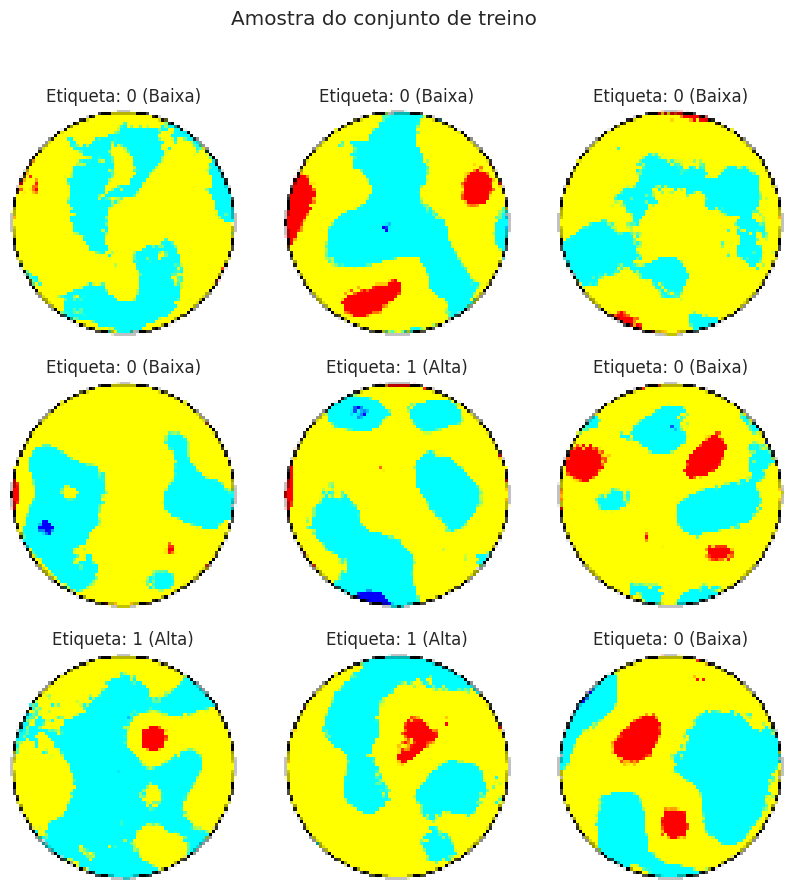

Tempo de treinamento: 3.92 segundos


In [ ]:
start_time = time.time()
# Pega um único lote do dataset
for image_batch, label_batch in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    plt.suptitle("Amostra do conjunto de treino")

    for i in range(9):
        # Cria uma grade de subplots 3x3
        ax = plt.subplot(3, 3, i + 1)

        # Mostra a i-ésima imagem do lote
        # .numpy() é necessário para converter o tensor do TF para um array que o matplotlib entende
        plt.imshow(image_batch[i].numpy())

        # Define o título da imagem com base na sua etiqueta
        label_index = label_batch[i].numpy()
        class_name = 'Alta' if label_index == 1 else 'Baixa'
        plt.title(f"Etiqueta: {label_index} ({class_name})")

        # Remove os eixos x e y para uma visualização mais limpa
        plt.axis("off")

    plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")


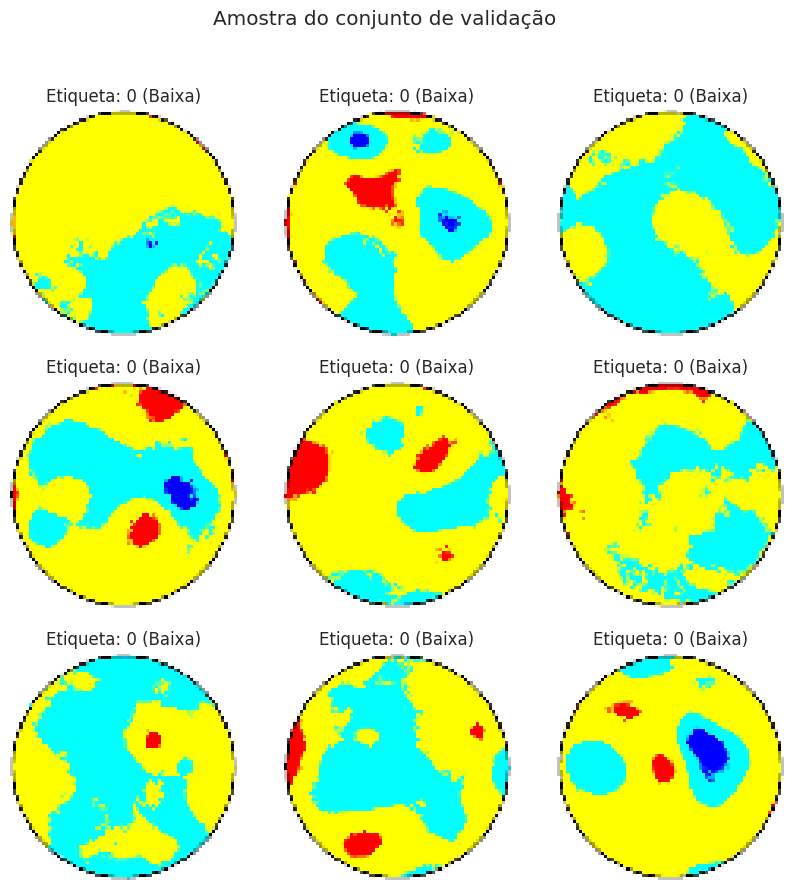

Tempo de treinamento: 0.76 segundos


In [ ]:
start_time = time.time()

# Pega um único lote do dataset
for image_batch, label_batch in val_ds.take(1):
    plt.figure(figsize=(10, 10))
    plt.suptitle("Amostra do conjunto de validação")

    for i in range(9):
        # Cria uma grade de subplots 3x3
        ax = plt.subplot(3, 3, i + 1)

        # Mostra a i-ésima imagem do lote
        # .numpy() é necessário para converter o tensor do TF para um array que o matplotlib entende
        plt.imshow(image_batch[i].numpy())

        # Define o título da imagem com base na sua etiqueta
        label_index = label_batch[i].numpy()
        class_name = 'Alta' if label_index == 1 else 'Baixa'
        plt.title(f"Etiqueta: {label_index} ({class_name})")

        # Remove os eixos x e y para uma visualização mais limpa
        plt.axis("off")

    plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

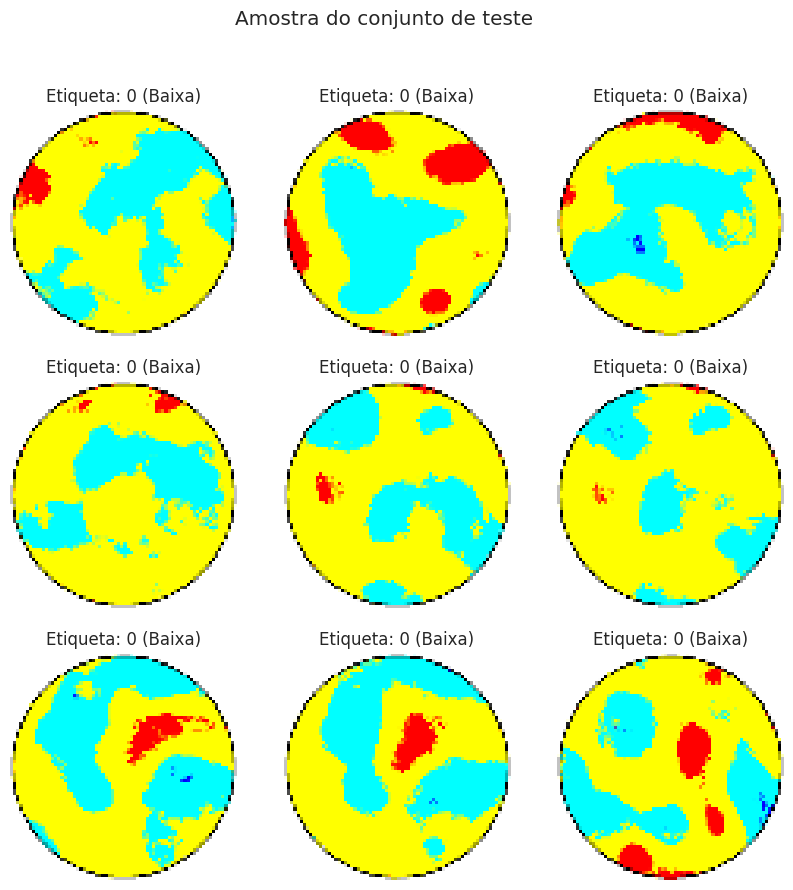

Tempo de treinamento: 0.61 segundos


In [ ]:
start_time = time.time()
# Pega um único lote do dataset
for image_batch, label_batch in test_ds.take(1):
    plt.figure(figsize=(10, 10))
    plt.suptitle("Amostra do conjunto de teste")

    for i in range(9):
        # Cria uma grade de subplots 3x3
        ax = plt.subplot(3, 3, i + 1)

        # Mostra a i-ésima imagem do lote
        # .numpy() é necessário para converter o tensor do TF para um array que o matplotlib entende
        plt.imshow(image_batch[i].numpy())

        # Define o título da imagem com base na sua etiqueta
        label_index = label_batch[i].numpy()
        class_name = 'Alta' if label_index == 1 else 'Baixa'
        plt.title(f"Etiqueta: {label_index} ({class_name})")

        # Remove os eixos x e y para uma visualização mais limpa
        plt.axis("off")

    plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

# Construção da CNN

In [ ]:
model_cnn = tf.keras.models.Sequential([
    # Camada Convolucional:16 filtros de tamanho 3x3. Procura por características iniciais.
    tf.keras.layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    # Camada de Pooling: Reduz o tamanho para 2x2, mantendo as características mais fortes.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Segundo bloco convolucional para aprender características mais complexas
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # achatar o resultado das camadas convolucionais.
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') # Saída para classificação binária
])


model_cnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 70, 70, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 35, 35, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 33, 33, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,297 (1.02 MB)

 Trainable params: 267,297 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Treinamento

In [ ]:
start_time_cnn = time.time()
history = model_cnn.fit(train_ds,
              epochs=10,
              validation_data=val_ds)
end_time = time.time()
elapsed_time = end_time - start_time_cnn
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.5116 - loss: 0.7569 - val_accuracy: 0.5521 - val_loss: 0.6922
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 39s 191ms/step - accuracy: 0.5602 - loss: 0.6854 - val_accuracy: 0.5542 - val_loss: 0.6918
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 36s 148ms/step - accuracy: 0.6017 - loss: 0.6717 - val_accuracy: 0.5417 - val_loss: 0.6913
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 34s 141ms/step - accuracy: 0.5925 - loss: 0.6667 - val_accuracy: 0.5708 - val_loss: 0.6954
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 34s 149ms/step - accuracy: 0.6007 - loss: 0.6536 - val_accuracy: 0.5760 - val_loss: 0.6975
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.6397 - loss: 0.6300 - val_accuracy: 0.5708 - val_loss: 0.6937
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 39s 158ms/step - accuracy: 0.6575 - loss: 0.5976 - val_accuracy: 0.5583 - val_loss: 0.7186
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 35s 148ms/step - accuracy: 0.6862 - loss: 0.5

## Gráfico da Acurácia e função de perda do treinamento e validação

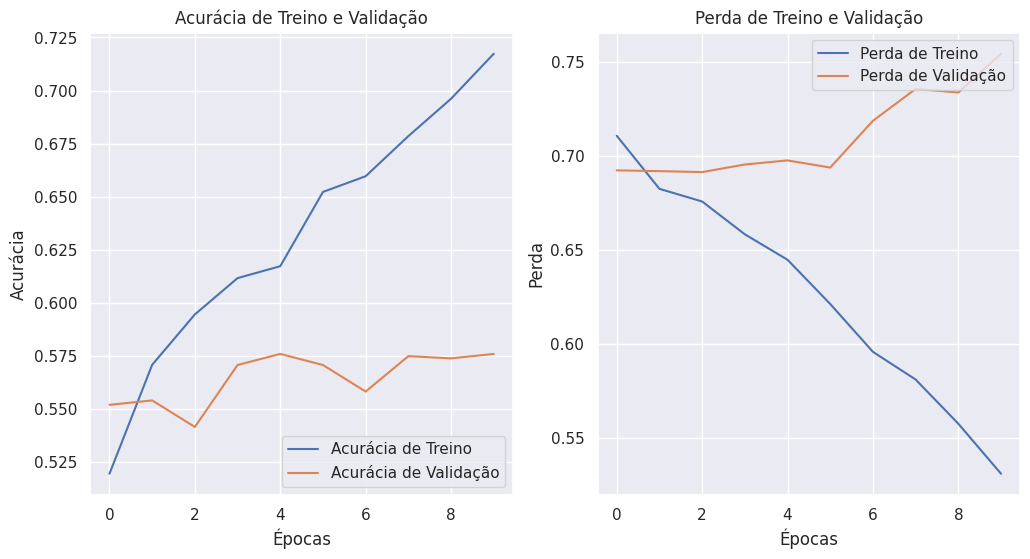

In [ ]:
# Extrai os dados do objeto history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Cria uma lista de épocas para o eixo X
epochs_range = range(len(acc))

# Cria uma figura com dois subplots (um para acurácia, outro para perda)
plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Subplot 2: Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

# Mostra os gráficos
plt.show()

# **Modelo da qualificação**

In [ ]:
model_quali = tf.keras.models.Sequential([
    # Procura por características iniciais.
    tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    # Mantem as características mais fortes.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Aprende características mais complexas
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Achata o resultado das camadas convolucionais.
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') # Saída para classificação binária
])


model_quali.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_quali.summary()

start_time_quali = time.time()
history_quali = model_quali.fit(train_ds,
              epochs=10,
              validation_data=val_ds)
end_time = time.time()
elapsed_time = end_time - start_time_quali
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 68, 68, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 34, 34, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,321 (1.17 MB)

 Trainable params: 307,321 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 44s 180ms/step - accuracy: 0.5191 - loss: 0.6979 - val_accuracy: 0.4948 - val_loss: 0.6981
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 38s 179ms/step - accuracy: 0.5759 - loss: 0.6776 - val_accuracy: 0.5323 - val_loss: 0.6927
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 39s 179ms/step - accuracy: 0.5917 - loss: 0.6655 - val_accuracy: 0.5406 - val_loss: 0.6945
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 37s 167ms/step - accuracy: 0.6043 - loss: 0.6589 - val_accuracy: 0.5583 - val_loss: 0.6944
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 38s 180ms/step - accuracy: 0.6510 - loss: 0.6332 - val_accuracy: 0.5479 - val_loss: 0.6932
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 43s 218ms/step - accuracy: 0.6980 - loss: 0.6076 - val_accuracy: 0.5615 - val_loss: 0.6949
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 39s 179ms/step - accuracy: 0.6871 - loss: 0.5971 - val_accuracy: 0.5740 - val_loss: 0.7229
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 42s 209ms/step - accuracy: 0.7076 - loss: 0

## Gráfico da Acurácia e função de perda do treinamento e validação

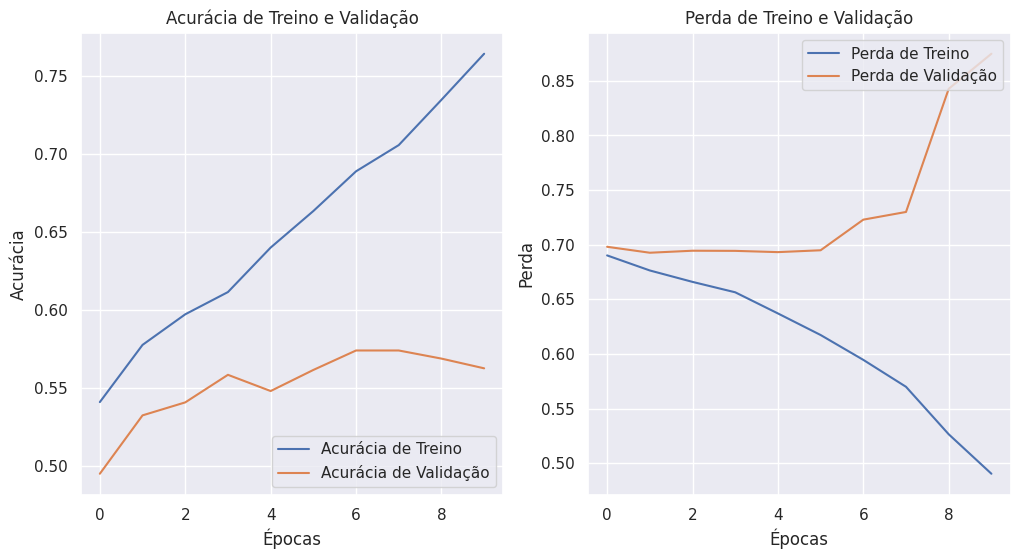

In [ ]:
# Extrai os dados do objeto history
acc = history_quali.history['accuracy']
val_acc = history_quali.history['val_accuracy']
loss = history_quali.history['loss']
val_loss = history_quali.history['val_loss']

# Cria uma lista de épocas para o eixo X
epochs_range = range(len(acc))
# Cria uma figura com dois subplots (um para acurácia, outro para perda)
plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Subplot 2: Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

# Mostra os gráficos
plt.show()

# Modelo da qualificação com regularização



### **Notas**
Melhores loss

\begin{tabular}
\hline
dropout  & 0.5 & 0.3 & 0.4\\
regularização & duas penúltimas camadas
\hline
\end{tabular}




In [ ]:
model_quali_regula = tf.keras.models.Sequential([
    # Procura por características iniciais.
    tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    # Mantem as características mais fortes.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Aprende características mais complexas
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Achata o resultado das camadas convolucionais.
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid') # Saída para classificação binária
])


model_quali_regula.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_quali_regula.summary()

start_time = time.time()
history_quali_regula = model_quali_regula.fit(train_ds,
              epochs=10,
              validation_data=val_ds)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 68, 68, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 34, 34, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,321 (1.17 MB)

 Trainable params: 307,321 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 38s 238ms/step - accuracy: 0.4963 - loss: 0.8498 - val_accuracy: 0.4969 - val_loss: 0.7261
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - accuracy: 0.5087 - loss: 0.7176 - val_accuracy: 0.4917 - val_loss: 0.7026
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 200ms/step - accuracy: 0.5341 - loss: 0.6987 - val_accuracy: 0.4792 - val_loss: 0.7011
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - accuracy: 0.5617 - loss: 0.6885 - val_accuracy: 0.4990 - val_loss: 0.7004
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 199ms/step - accuracy: 0.5648 - loss: 0.6879 - val_accuracy: 0.5021 - val_loss: 0.7064
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 27s 202ms/step - accuracy: 0.5855 - loss: 0.6793 - val_accuracy: 0.5271 - val_loss: 0.7021
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 27s 182ms/step - accuracy: 0.5989 - loss: 0.6749 - val_accuracy: 0.4979 - val_loss: 0.7009
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 42s 184ms/step - accuracy: 0.6069 - loss: 0

## Gráfico da Acurácia e função de perda do treinamento e validação

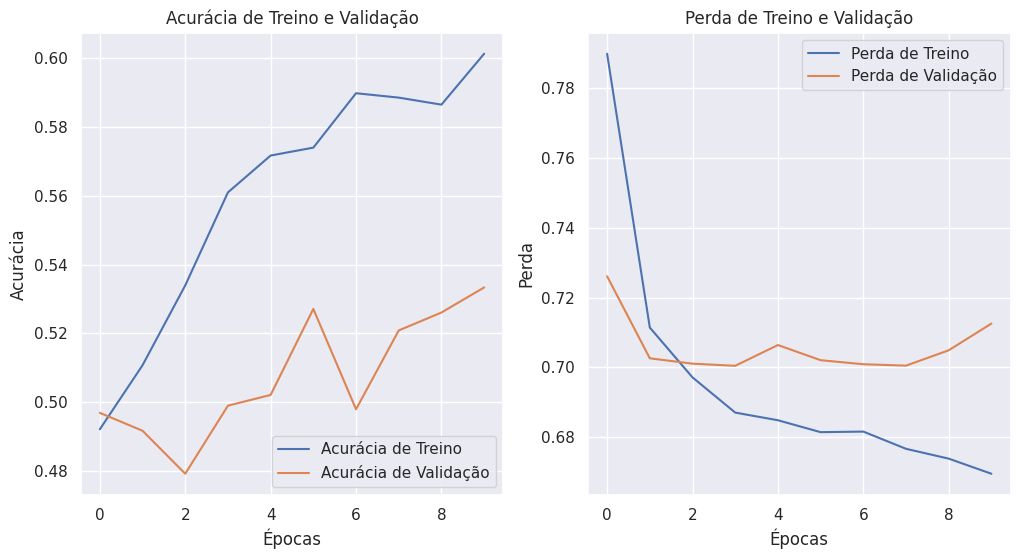

In [ ]:
# Extrai os dados do objeto history
acc = history_quali_regula.history['accuracy']
val_acc = history_quali_regula.history['val_accuracy']
loss = history_quali_regula.history['loss']
val_loss = history_quali_regula.history['val_loss']

# Cria uma lista de épocas para o eixo X
epochs_range = range(len(acc)) # Ou simplesmente range(20), se você não interromper o treino

# Cria uma figura com dois subplots (um para acurácia, outro para perda)
plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Subplot 2: Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

# Mostra os gráficos
plt.show()


# Hiperparâmetros

In [ ]:
from tensorboard.plugins.hparams import api as hp

In [ ]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([6, 32, 64, 128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.3, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
      hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
      metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  model_hiperparametro = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (5, 5), strides=(1, 1), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (5, 5), strides=(1, 1), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (5, 5), strides=(1, 1), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),


    # Achata o resultado das camadas convolucionais.
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=tf.nn.relu),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    # Saída para classificação binária
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
  ])

  model_hiperparametro.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='binary_crossentropy',
      metrics=['accuracy'],
  )

  model_hiperparametro.fit(train_ds, epochs=1) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model_hiperparametro.evaluate(val_ds)
  return accuracy

def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 6, 'dropout': 0.3, 'optimizer': 'adam'}
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 163ms/step - accuracy: 0.5211 - loss: 0.6910
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5764 - loss: 0.6900
--- Starting trial: run-1
{'num_units': 6, 'dropout': 0.3, 'optimizer': 'sgd'}
123/123 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - accuracy: 0.4950 - loss: 0.7052
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6100 - loss: 0.6874
--- Starting trial: run-2
{'num_units': 6, 'dropout': 0.5, 'optimizer': 'adam'}
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.5222 - loss: 0.6949
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3924 - loss: 0.7084
--- Starting trial: run-3
{'num_units': 6, 'dropout': 0.5, 'optimizer': 'sgd'}
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - accuracy: 0.5108 - loss: 0.6963
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.1879 - loss: 0.6946
--- Starting trial: run-4
{'num_units': 32, 'dropout': 0.3, 'optimizer': '

### **Notas**
Melhores loss

\begin{tabular}
\hline
**filtros**= 2 conv (5x5)  e 1 conv (3x3)\\
**dropout** = 0.5 & \\
**otimizador** = sgd \\
**regularização** = duas penúltimas camadas
\hline
\end{tabular}

# Modelo da qualificação com hiperparâmetro otimizador = sgd

In [ ]:
model_quali_sgd = tf.keras.models.Sequential([
    # Procura por características iniciais.
    tf.keras.layers.Conv2D(6, (3, 3), strides=(1, 1), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    # Mantem as características mais fortes.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Aprende características mais complexas
    tf.keras.layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Achata o resultado das camadas convolucionais.
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') # Saída para classificação binária
])


model_quali_sgd.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_quali_sgd.summary()

start_time = time.time()
history_quali__sgd = model_quali_sgd.fit(train_ds,
              epochs=10,
              validation_data=val_ds)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tempo de treinamento: {elapsed_time:.2f} segundos")

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 70, 70, 6)      │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 35, 35, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 33, 33, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 14, 14, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,993 (1.57 MB)

 Trainable params: 411,993 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.4903 - loss: 0.9690 - val_accuracy: 0.5021 - val_loss: 0.9636
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 201ms/step - accuracy: 0.5219 - loss: 0.9617 - val_accuracy: 0.4875 - val_loss: 0.9637
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.5233 - loss: 0.9587 - val_accuracy: 0.4875 - val_loss: 0.9635
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 121ms/step - accuracy: 0.5324 - loss: 0.9535 - val_accuracy: 0.5000 - val_loss: 0.9593
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.5411 - loss: 0.9531 - val_accuracy: 0.5125 - val_loss: 0.9586
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.5343 - loss: 0.9523 - val_accuracy: 0.5219 - val_loss: 0.9566
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.5558 - loss: 0.9468 - val_accuracy: 0.5260 - val_loss: 0.9560
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 30s 206ms/step - accuracy: 0.5670 - loss: 0

## Gráfico da Acurácia e função de perda do treinamento e validação

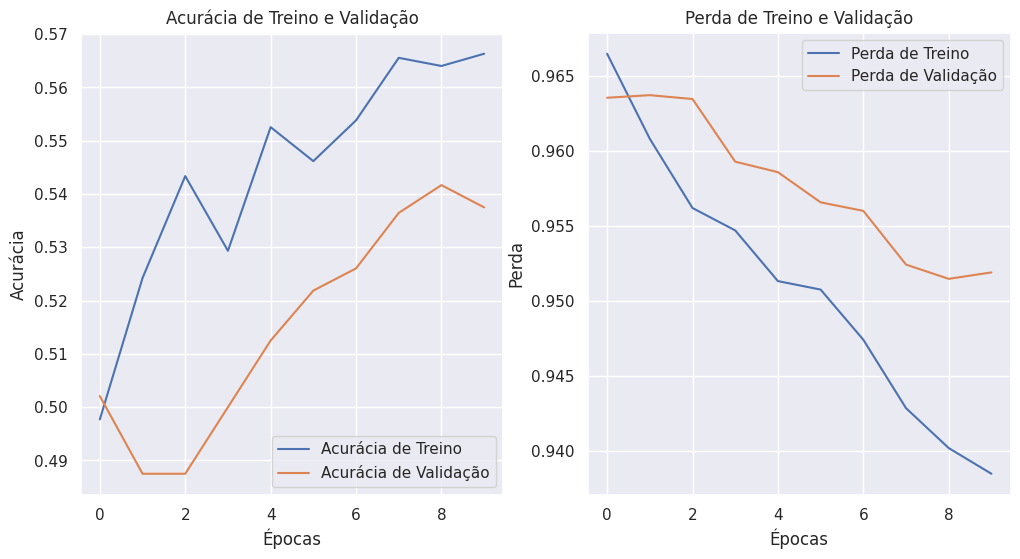

In [ ]:
# Extrai os dados do objeto history
acc = history_quali__sgd.history['accuracy']
val_acc = history_quali__sgd.history['val_accuracy']
loss = history_quali__sgd.history['loss']
val_loss = history_quali__sgd.history['val_loss']

# Cria uma lista de épocas para o eixo X
epochs_range = range(len(acc)) # Ou simplesmente range(20), se você não interromper o treino

# Cria uma figura com dois subplots (um para acurácia, outro para perda)
plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Subplot 2: Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

# Mostra os gráficos
plt.show()


# Modelo Hiperparametros

In [ ]:
model_hiper = tf.keras.models.Sequential([
    # Procura por características iniciais.
    tf.keras.layers.Conv2D(64, (5, 5), strides=(1, 1), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    # Mantem as características mais fortes.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Aprende características mais complexas
    tf.keras.layers.Conv2D(64, (5, 5), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (5, 5), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Achata o resultado das camadas convolucionais.
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') # Saída para classificação binária
])


model_hiper.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_hiper.summary()

start_time_hiper = time.time()
history_hiper = model_hiper.fit(train_ds,
              epochs=10,
              validation_data=val_ds)
end_time = time.time()
elapsed_time_hiper = end_time - start_time_hiper
print(f"Tempo de treinamento: {elapsed_time_hiper:.2f} segundos")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 68, 68, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 312,321 (1.19 MB)

 Trainable params: 312,321 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 797s 2s/step - accuracy: 0.5130 - loss: 0.8819 - val_accuracy: 0.4990 - val_loss: 0.8829
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 120s 852ms/step - accuracy: 0.5110 - loss: 0.8789 - val_accuracy: 0.5302 - val_loss: 0.8792
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 118s 832ms/step - accuracy: 0.5212 - loss: 0.8751 - val_accuracy: 0.5375 - val_loss: 0.8772
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 140s 818ms/step - accuracy: 0.5769 - loss: 0.8699 - val_accuracy: 0.5281 - val_loss: 0.8771
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 143s 827ms/step - accuracy: 0.5493 - loss: 0.8697 - val_accuracy: 0.5312 - val_loss: 0.8746
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 151s 903ms/step - accuracy: 0.5655 - loss: 0.8653 - val_accuracy: 0.5198 - val_loss: 0.8754
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 131s 808ms/step - accuracy: 0.5592 - loss: 0.8601 - val_accuracy: 0.5479 - val_loss: 0.8704
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 142s 811ms/step - accuracy: 0.5613 - lo

## Gráfico da Acurácia e função de perda do treinamento e validação

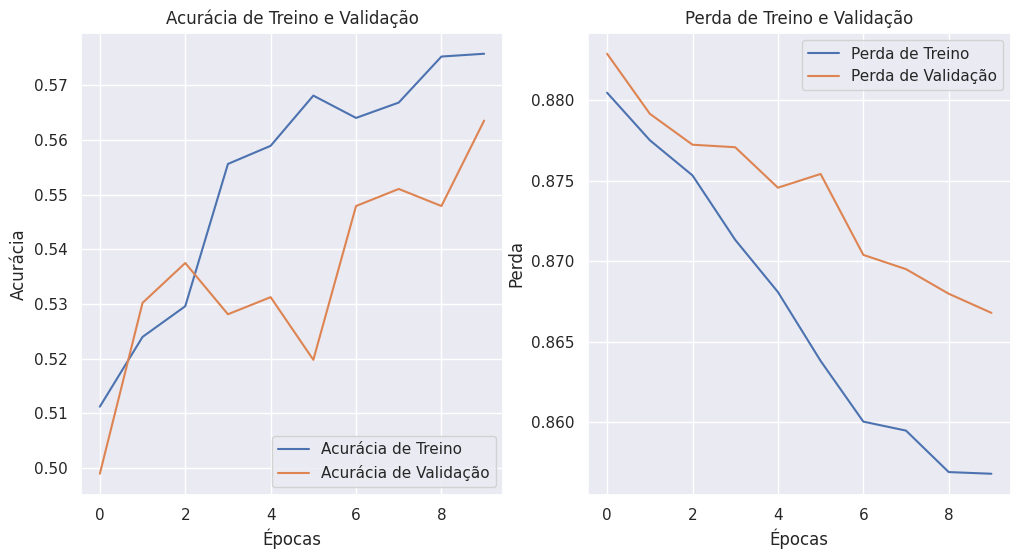

In [ ]:
# Extrai os dados do objeto history
acc = history_hiper.history['accuracy']
val_acc = history_hiper.history['val_accuracy']
loss = history_hiper.history['loss']
val_loss = history_hiper.history['val_loss']

# Cria uma lista de épocas para o eixo X
epochs_range = range(len(acc))

# Cria uma figura com dois subplots (um para acurácia, outro para perda)
plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Subplot 2: Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

# Mostra os gráficos
plt.show()


#Modelo hiperarametro run 3, 7 e 11
parâmetros escolhidos baseado na faxia da função de perda

In [ ]:
model_hiper_runs = tf.keras.models.Sequential([
    # Procura por características iniciais.
    tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    # Mantem as características mais fortes.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Aprende características mais complexas
    tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Achata o resultado das camadas convolucionais.
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid') # Saída para classificação binária
])


model_hiper_runs.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_hiper_runs.summary()

start_time_hiper_runs = time.time()
history_hiper_runs = model_hiper_runs.fit(train_ds,
              epochs=10,
              validation_data=val_ds)
end_time = time.time()
elapsed_time_hiper_runs = end_time - start_time_hiper_runs
print(f"Tempo de treinamento: {elapsed_time_hiper_runs:.2f} segundos")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 68, 68, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 34, 34, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 30, 30, 32)     │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,249 (321.29 KB)

 Trainable params: 82,249 (321.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - accuracy: 0.5059 - loss: 0.8449 - val_accuracy: 0.5135 - val_loss: 0.8426
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - accuracy: 0.5252 - loss: 0.8410 - val_accuracy: 0.5094 - val_loss: 0.8426
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 82s 203ms/step - accuracy: 0.5430 - loss: 0.8388 - val_accuracy: 0.5042 - val_loss: 0.8418
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 47s 247ms/step - accuracy: 0.5504 - loss: 0.8375 - val_accuracy: 0.5083 - val_loss: 0.8400
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 55s 301ms/step - accuracy: 0.5535 - loss: 0.8339 - val_accuracy: 0.5490 - val_loss: 0.8382
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 43s 221ms/step - accuracy: 0.5517 - loss: 0.8326 - val_accuracy: 0.5323 - val_loss: 0.8364
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 0.5696 - loss: 0.8279 - val_accuracy: 0.5500 - val_loss: 0.8354
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 43s 229ms/step - accuracy: 0.5717 - loss: 0

## Gráfico da Acurácia e função de perda do treinamento e validação

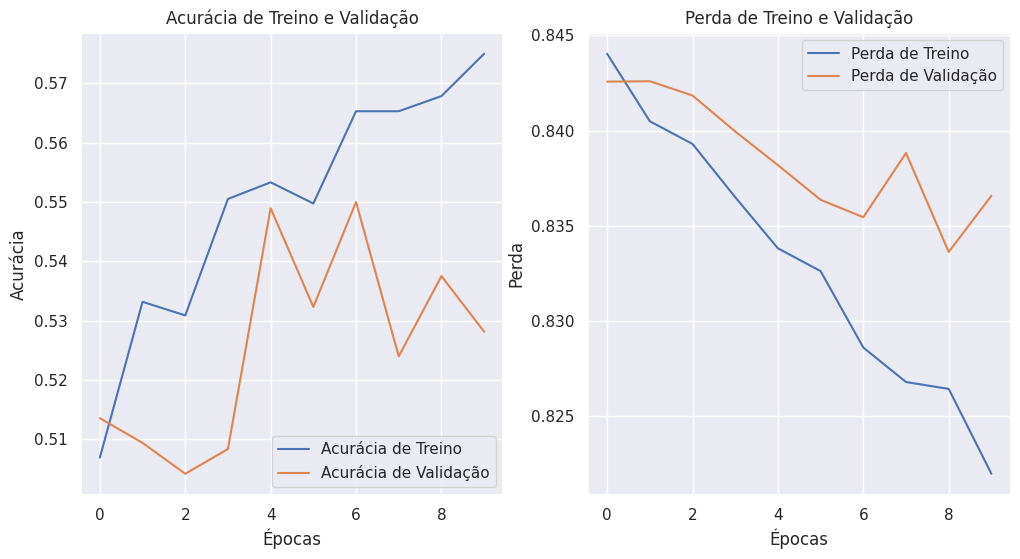

In [ ]:
# Extrai os dados do objeto history
acc = history_hiper_runs.history['accuracy']
val_acc = history_hiper_runs.history['val_accuracy']
loss = history_hiper_runs.history['loss']
val_loss = history_hiper_runs.history['val_loss']

# Cria uma lista de épocas para o eixo X
epochs_range = range(len(acc))

# Cria uma figura com dois subplots (um para acurácia, outro para perda)
plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Subplot 2: Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

# Mostra os gráficos
plt.show()


In [ ]:
model_hiper_runs = tf.keras.models.Sequential([
    # Procura por características iniciais.
    tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    # Mantem as características mais fortes.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Aprende características mais complexas
    tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Achata o resultado das camadas convolucionais.
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid') # Saída para classificação binária
])


model_hiper_runs.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_hiper_runs.summary()

start_time_hiper_runs = time.time()
history_hiper_runs = model_hiper_runs.fit(train_ds,
              epochs=10,
              validation_data=val_ds)
end_time = time.time()
elapsed_time_hiper_runs = end_time - start_time_hiper_runs
print(f"Tempo de treinamento: {elapsed_time_hiper_runs:.2f} segundos")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 68, 68, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 34, 34, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,009 (355.50 KB)

 Trainable params: 91,009 (355.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 49s 263ms/step - accuracy: 0.4989 - loss: 0.8508 - val_accuracy: 0.5385 - val_loss: 0.8426
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 47s 253ms/step - accuracy: 0.5024 - loss: 0.8434 - val_accuracy: 0.5063 - val_loss: 0.8422
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 49s 269ms/step - accuracy: 0.5178 - loss: 0.8406 - val_accuracy: 0.4927 - val_loss: 0.8419
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 52s 298ms/step - accuracy: 0.5304 - loss: 0.8382 - val_accuracy: 0.5323 - val_loss: 0.8389
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 82s 293ms/step - accuracy: 0.5452 - loss: 0.8368 - val_accuracy: 0.5573 - val_loss: 0.8376
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 79s 260ms/step - accuracy: 0.5416 - loss: 0.8365 - val_accuracy: 0.5188 - val_loss: 0.8383
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 46s 252ms/step - accuracy: 0.5570 - loss: 0.8327 - val_accuracy: 0.5594 - val_loss: 0.8356
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 82s 252ms/step - accuracy: 0.5455 - loss: 0

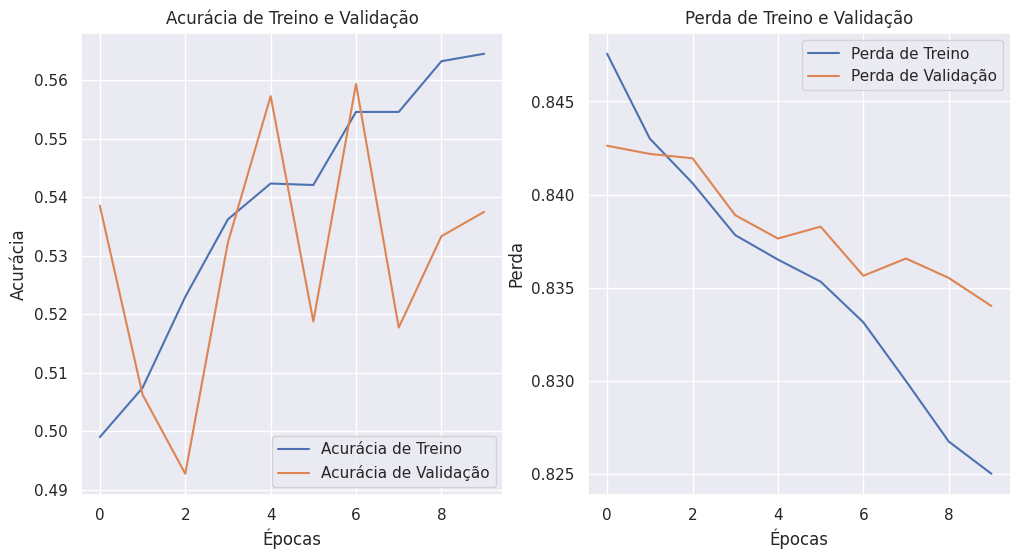

In [ ]:
# Extrai os dados do objeto history
acc = history_hiper_runs.history['accuracy']
val_acc = history_hiper_runs.history['val_accuracy']
loss = history_hiper_runs.history['loss']
val_loss = history_hiper_runs.history['val_loss']

# Cria uma lista de épocas para o eixo X
epochs_range = range(len(acc))

# Cria uma figura com dois subplots (um para acurácia, outro para perda)
plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Subplot 2: Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

# Mostra os gráficos
plt.show()


# Teste do modelo

In [ ]:
test_loss, test_acc = model_quali_regula.evaluate(test_ds)
print(f"Acurácia final no conjunto de teste: {test_acc:.4f}")

# Salvar modelo

In [ ]:
model.save('meu_modelo_classificador.h5')
# Para carregar depois:
# from tensorflow.keras.models import load_model
# loaded_model = load_model('meu_modelo_classificador.h5')